### Code für die Darstellung des Gram-Spektraeders für das gewählte Beispiel der binären Form

#### Binäre Form: 
\begin{equation}
    f\left(s,t\right) = s^6 - 4s^5t + 47s^4t^2 - 150s^3t^3 + 838s^2t^4 - 1360st^5 + 2600
\end{equation}
#### Erzeugt folgende Gram-Matrizen:
\begin{equation} % Muss ich die Matrix näher ausführen?
\label{eq:Gram}
    G\left(g_{20},g_{30},g_{31}\right)=\begin{pmatrix}
        1 & -2 & g_{20} & g_{30}\\
        -2 & 47-2g_{20} & -75-g_{30} & g_{31}\\
        g_{20} & -75-g_{30} & 838 -2g_{31} & -680\\
        g_{30} & g_{31} & -680 & 2600
    \end{pmatrix}.
\end{equation}

#### Punkte, die zu positiv-semidefiniten Gram-Matrizen mit Rang zwei führen
\begin{equation}
    \begin{split}
        & G\left(-39, 34, -486\right),\\
        & G\left(21, -46, 114\right),\\
        & G\left(-3, 10, 330\right),\\
        & G\left(17, 10, 130\right)\\
    \end{split}
\end{equation}

In [10]:
# verwendete Bibliotheken
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import Delaunay

In [11]:
# Funktion zum testen, ob eine Matrix positiv-semidefinit ist -> verwendet Eigenschaft, dass Eigenvektoren größer gleich 0 sind
def is_positive_semidefinite(matrix):
    eigenvalues = np.linalg.eigvals(matrix)
    return all(eigenvalues >= 0)

In [12]:
# beschränken des untersuchten Bereichs für (g_20, g_30, g_31) = (x_1, x_2, x_3)-Koordinaten
# Beschränken jeden Wert mit den jeweils niedrigsten und höchsten Koordinaten der Extrempunkte mit Rang 2
# Dabei wird unten und oben ein 'Puffer' gelassen, um alle positiv-semidefiniten Gram-Matrizen zu finden
# betrachtet werden 25 Punkte in jedem Intervall -> Menge kann erhöht werden
values_1 = np.linspace(-50, 40, 25) 
values_2 = np.linspace(-60, 50, 25)
values_3 = np.linspace(-500, 400, 25)

In [13]:
# Erzeugen einer Liste, die alle Punkte speichert, für die eine positiv-semidefinite Gram-Matrix gefunden wurde
points_list = []

In [14]:
# Suchen der Punkte, für die die Gram-Matrix positiv-semidefinit ist
for x_1 in values_1:
    for x_2 in values_2:
        for x_3 in values_3:
            matrix = np.array([[1, -2, x_1, x_2],
                               [-2, 47-2*x_1, -75-x_2, x_3],
                               [x_1, -75-x_2, 838-2*x_3,-680],
                               [x_2, x_3, -680, 2600]])
            if(is_positive_semidefinite(matrix) == True):
                point = np.array([x_1, x_2, x_3])
                points_list.append(point)

In [15]:
# Umwandeln der Liste in einen Array, damit ein Plot möglich ist
points_array = np.array(points_list)

In [16]:
# Für einen interaktiven Plot
%matplotlib notebook

<IPython.core.display.Javascript object>


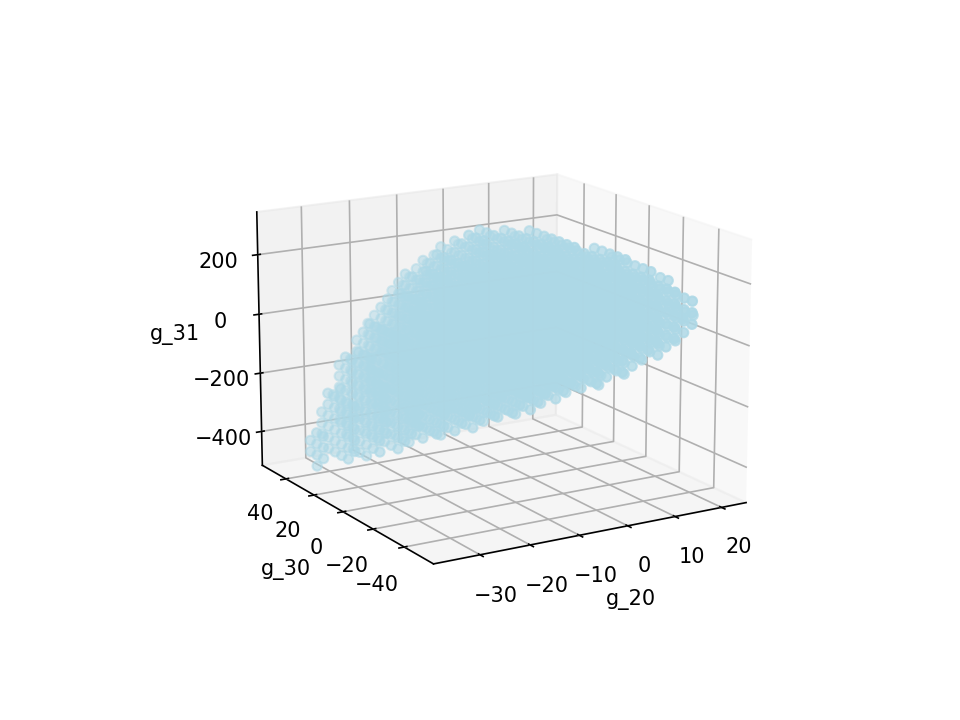

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter-Plot für die Punkte, die gefunden wurden
ax.scatter(points_array[:, 0], points_array[:, 1], points_array[:, 2], c='lightblue', marker='o')

# Bezeichnung für die Achsen
ax.set_xlabel('g_20')
ax.set_ylabel('g_30')
ax.set_zlabel('g_31')

plt.show()

In [18]:
# erzeugt eine konvexe Hülle aller gefundenen Punkte für die die Gram-Matrizen positiv-semidefinit sind
# dies kann verwendet werden, weil bekannt ist, dass der Gram-Spektraeder eine konvexe Menge ist
# erhält somit eine approximative Darstellung des Gram-Spektraeders im R^3
triangles = Delaunay(points_array).simplices

<IPython.core.display.Javascript object>


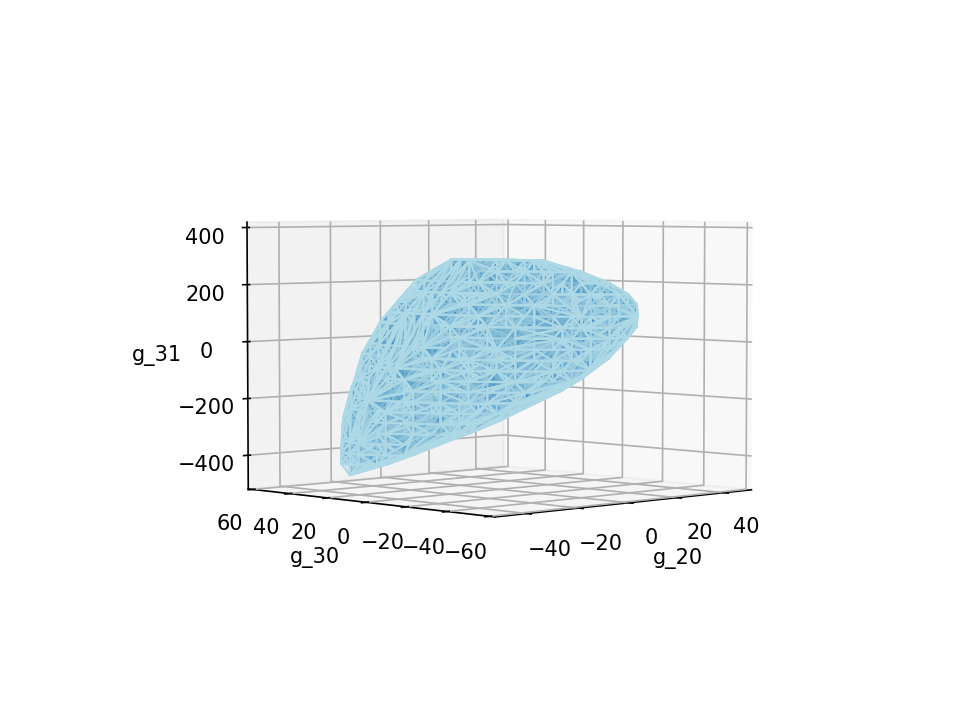

In [19]:
# Surface-Plot für die Punkte, die oben gefunden wurden
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Erstellt eine Sammlung von 3D Objekten, hier die Dreiecke, die in der Triangulierung verwendet werden
collection = Poly3DCollection(points_array[triangles], edgecolor='lightblue', alpha=0.1)

# Fügt die Sammlung der 3D Objekte zum Plot hinzu
ax.add_collection3d(collection)

# Bezeichnung der Achsen
ax.set_xlabel('g_20')
ax.set_ylabel('g_30')
ax.set_zlabel('g_31')

# Neue Grenzen für die Achsen
ax.set_xlim([-50, 50])
ax.set_ylim([-60, 60])
ax.set_zlim([-500, 400])


plt.show()